In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Workaround to fix chrome issue where folium won't plot maps with a large number of layers
# See comment by dstein64 at: https://github.com/python-visualization/folium/issues/812

import base64
def _repr_html_(self, **kwargs):
    html = base64.b64encode(self.render(**kwargs).encode('utf8')).decode('utf8')
    onload = (
        'this.contentDocument.open();'
        'this.contentDocument.write(atob(this.getAttribute(\'data-html\')));'
        'this.contentDocument.close();'
    )
    if self.height is None:
        iframe = (
            '<div style="width:{width};">'
            '<div style="position:relative;width:100%;height:0;padding-bottom:{ratio};">'
            '<iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;'
            'border:none !important;" '
            'data-html={html} onload="{onload}" '
            'allowfullscreen webkitallowfullscreen mozallowfullscreen>'
            '</iframe>'
            '</div></div>').format
        iframe = iframe(html=html, onload=onload, width=self.width, ratio=self.ratio)
    else:
        iframe = ('<iframe src="about:blank" width="{width}" height="{height}"'
                  'style="border:none !important;" '
                  'data-html={html} onload="{onload}" '
                  '"allowfullscreen" "webkitallowfullscreen" "mozallowfullscreen">'
                  '</iframe>').format
        iframe = iframe(html=html, onload=onload, width=self.width, height=self.height)
    return iframe

folium.branca.element.Figure._repr_html_ = _repr_html_


In [3]:
# Define region and radius of interest
# Glasgow: [55.8642,-4.2518]
latlon = [55.8642,-4.2518]
dist = 3*1000
graph = ox.graph_from_point(latlon,distance=dist)

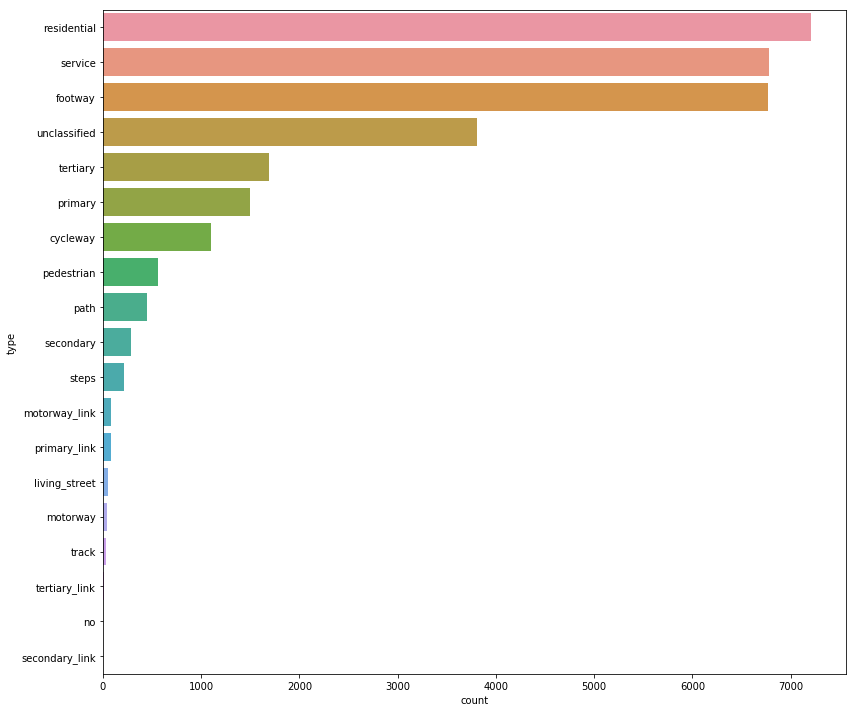

In [4]:
# Get intersection and streets from graph
nodes, streets = ox.graph_to_gdfs(graph)
# Identify street types and count
street_types = pd.DataFrame(streets["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
plt.savefig("barchart.png")

In [5]:
cyclepaths = streets[streets.highway == 'cycleway']

style = {'color': '#F7DC6F', 'weight':'1'}
m = folium.Map(latlon,
               zoom_start=15,
               tiles="CartoDb dark_matter")
folium.GeoJson(cyclepaths, style_function=lambda x: style).add_to(m)
m.save("bike_paths.html")
m

In [6]:
cyclepaths.head()

,u,v,key,osmid,oneway,ref,name,highway,maxspeed,length,geometry,access,bridge,lanes,service,width,junction,tunnel,est_width,area
25,262373433,262378686,0,"[24232512, 24232021, 24232510]",False,NaN,Kelvin Walkway,cycleway,NaN,566.075,"LINESTRING (-4.28054 55.87479, -4.28028 55.874...",NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,262373433,262373308,0,"[24232020, 24232021]",False,NaN,Kelvin Walkway,cycleway,NaN,64.713,"LINESTRING (-4.28054 55.87479, -4.28084 55.874...",NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,152797305,1790152671,0,167636236,False,NaN,NaN,cycleway,NaN,6.895,"LINESTRING (-4.28317 55.86144, -4.28328 55.86143)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,28377420,1269186534,0,37132385,False,NaN,NaN,cycleway,NaN,6.855,"LINESTRING (-4.21930 55.84910, -4.21927 55.84904)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,1476034983,1338726679,0,"[725978816, 725978817, 725978818]",False,NaN,NaN,cycleway,NaN,96.783,"LINESTRING (-4.29247 55.86871, -4.29264 55.868...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
street_types

,type,count
0,residential,7203
1,service,6775
2,footway,6767
3,unclassified,3806
4,tertiary,1688
5,primary,1494
6,cycleway,1099
7,pedestrian,564
8,path,452
9,secondary,287
